In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('glassdoor_cleandedata.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,Company_text,Job_State,Same_State,Company_Age,python_yn,SQL_yn,Hadoop_yn,AWS_yn
0,Data Engineer,$69K-$91K (Glassdoor est.),POSITION SUMMARY\n\n\nThe candidate will be jo...,3.6,Bayview Asset Management\n3.6,"Coral Gables, FL","Coral Gables, FL",1001 to 5000 employees,1995,Company - Private,...,91,80.0,Bayview Asset Management\n,FL,1,25,1,0,0,0
1,Data Engineer,$69K-$91K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nThis ...",4.1,ManTech\n4.1,"Herndon, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,91,80.0,ManTech\n,VA,1,52,0,0,0,0
2,Senior Data Engineer,$69K-$91K (Glassdoor est.),"Company Description\n\nPaying the right way, g...",2.8,PayScale\n2.8,"Seattle, WA","Seattle, WA",201 to 500 employees,2002,Company - Private,...,91,80.0,PayScale\n,WA,1,18,1,0,0,0
3,Data Engineer,$69K-$91K (Glassdoor est.),BRMi Technology is seeking multiple Data Engin...,4.4,BRMi\n4.4,"Chantilly, VA","Silver Spring, MD",51 to 200 employees,2004,Company - Private,...,91,80.0,BRMi\n,VA,0,16,1,0,0,0
4,Data Engineer,$69K-$91K (Glassdoor est.),IZEA was built to connect the world’s top bran...,4.2,IZEA\n4.2,"Winter Park, FL","Winter Park, FL",51 to 200 employees,2006,Company - Public,...,91,80.0,IZEA\n,FL,1,14,1,0,0,0


In [4]:
def title_simplifier(title):
    if 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'Software' in title.lower():
        return 'Software Engineer'
    elif 'big data' in title.lower():
        return 'big data engineer'
    elif 'devops engineer' in title.lower():
        return 'devops engineer'
    elif 'director' in title.lower():
        return 'director'
    elif 'cloud' in title.lower():
        return 'cloud architecht'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'systems' in title.lower():
        return 'systems engineer'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		

		

In [5]:
# Job title
df['job_simple'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_simple.value_counts()

na                   587
data engineer        185
systems engineer      60
data analyst          20
cloud architecht      20
devops engineer       16
data scientist        10
big data engineer      5
manager                5
director               2
Name: job_simple, dtype: int64

In [7]:
#Job seniority 
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

na        563
senior    347
Name: seniority, dtype: int64

In [13]:
#  Fix state Los Angeles
df['Job_State'] = df.Job_State.apply(lambda x: x.strip() if x.strip().lower() != 'virginia' else "VA")
df['Job_State'] = df.Job_State.apply(lambda x: x.strip() if x.strip().lower() != 'minnesota' else "MN")
df['Job_State'] = df.Job_State.apply(lambda x: x.strip() if x.strip().lower() != 'united states' else "USA")
df.Job_State.value_counts()

CA        152
MA        104
VA         78
NY         69
IL         68
MD         47
WA         32
TX         28
GA         25
MI         24
MO         20
UT         18
MN         18
OH         18
CO         17
PA         16
Remote     14
NJ         14
NC         13
AZ         12
WI         11
OR         11
SC         11
IA          9
IN          9
AL          9
TN          8
FL          7
USA         5
NM          5
CT          4
VT          4
DC          4
LA          4
KY          4
WY          3
DE          3
NV          2
NE          2
SD          2
ID          2
ME          2
RI          1
WV          1
Name: Job_State, dtype: int64

In [15]:
##  Job description length 
df['jobdesc_len'] = df['Job Description'].apply(lambda x: len(x))
df['jobdesc_len']

0       1768
1       3243
2       4160
3       2634
4      10051
       ...  
905     3449
906     4070
907     5634
908     3112
909     2317
Name: jobdesc_len, Length: 910, dtype: int64

In [24]:
#  Competitor count
df['Competitors']
df['number_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != "-1" else 0)

In [25]:
df['number_comp']

0      0
1      0
2      2
3      0
4      2
      ..
905    3
906    0
907    0
908    0
909    0
Name: number_comp, Length: 910, dtype: int64

In [27]:
#remove new line from job title
df['Company_text'] = df.Company_text.apply(lambda x: x.replace('\n', ''))
df['Company_text']

0           Bayview Asset Management
1                            ManTech
2                           PayScale
3                               BRMi
4                               IZEA
                   ...              
905                    Translate Bio
906                       Relativity
907             Moderna Therapeutics
908              CollabraSpace, Inc.
909    Watlow Electric Manufacturing
Name: Company_text, Length: 910, dtype: object

In [29]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,Same_State,Company_Age,python_yn,SQL_yn,Hadoop_yn,AWS_yn,jobdesc_len,number_comp
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.0,910.0,910.0,910.000000,910.000000
mean,3.893516,1985.497802,86.804396,119.984615,103.394505,0.473626,34.502198,0.417582,0.0,0.0,0.0,3918.564835,0.948352
std,0.564607,38.431021,21.622198,28.460224,22.598674,0.499579,38.431021,0.493432,0.0,0.0,0.0,1431.082758,1.324464
min,2.200000,1806.000000,48.000000,77.000000,62.500000,0.000000,2.000000,0.000000,0.0,0.0,0.0,703.000000,0.000000
25%,3.400000,1982.000000,69.000000,100.000000,87.500000,0.000000,11.000000,0.000000,0.0,0.0,0.0,2935.500000,0.000000
50%,3.800000,2000.000000,89.000000,110.000000,101.000000,0.000000,20.000000,0.000000,0.0,0.0,0.0,3820.000000,0.000000
75%,4.300000,2009.000000,103.000000,135.000000,117.500000,1.000000,38.000000,1.000000,0.0,0.0,0.0,4701.000000,3.000000
max,5.000000,2018.000000,132.000000,190.000000,147.500000,1.000000,214.000000,1.000000,0.0,0.0,0.0,11384.000000,4.000000


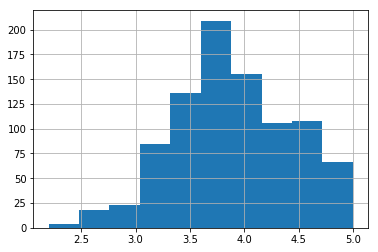

In [33]:
df.Rating.hist()

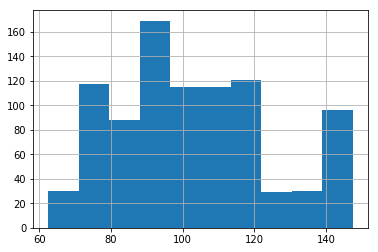

In [34]:
df.avg_salary.hist()

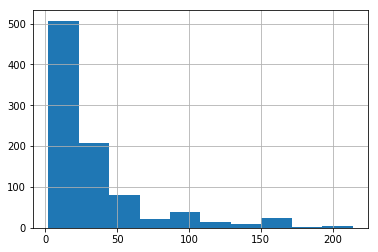

In [37]:
df.Company_Age.hist()

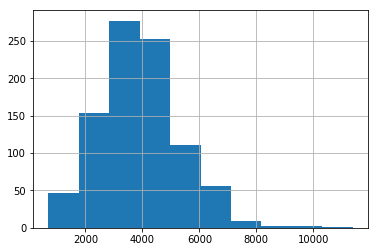

In [42]:
df. jobdesc_len.hist()

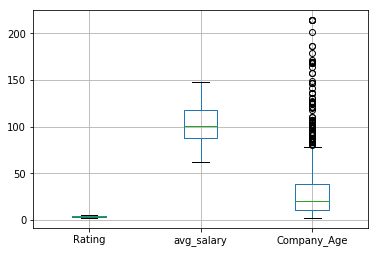

In [45]:
df.boxplot(column = ['Rating', 'avg_salary', 'Company_Age'])  

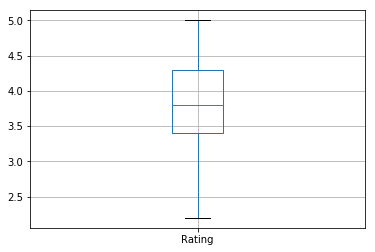

In [46]:
df.boxplot(column = ['Rating'])

In [48]:
df[['Rating', 'avg_salary', 'Company_Age', 'jobdesc_len']].corr() 

,Rating,avg_salary,Company_Age,jobdesc_len
Rating,1.000000,0.035749,-0.225845,-0.157123
avg_salary,0.035749,1.000000,-0.021542,0.009198
Company_Age,-0.225845,-0.021542,1.000000,0.104772
jobdesc_len,-0.157123,0.009198,0.104772,1.000000


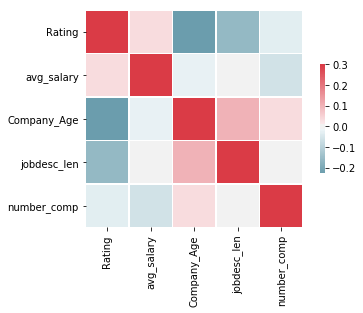

In [53]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Rating', 'avg_salary', 'Company_Age', 'jobdesc_len', 'number_comp']].corr(), vmax=.3, center=0, cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [61]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_text', 'Job_State',
       'Same_State','job_simple', 'seniority', 'python_yn']]
df_cat.head()

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Company_text,Job_State,Same_State,job_simple,seniority,python_yn
0,"Coral Gables, FL","Coral Gables, FL",1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,$100 to $500 million (USD),Bayview Asset Management,FL,1,data engineer,na,1
1,"Herndon, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),ManTech,VA,1,data engineer,na,0
2,"Seattle, WA","Seattle, WA",201 to 500 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,PayScale,WA,1,data engineer,senior,1
3,"Chantilly, VA","Silver Spring, MD",51 to 200 employees,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,BRMi,VA,0,data engineer,na,1
4,"Winter Park, FL","Winter Park, FL",51 to 200 employees,Company - Public,Advertising & Marketing,Business Services,$25 to $50 million (USD),IZEA,FL,1,data engineer,na,1


graph for Location: total =227


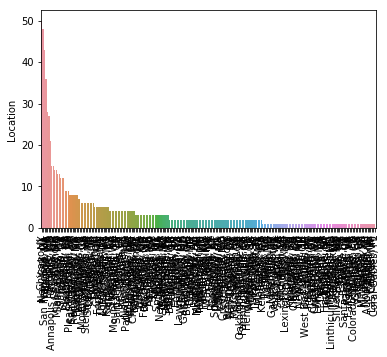

graph for Headquarters: total =203


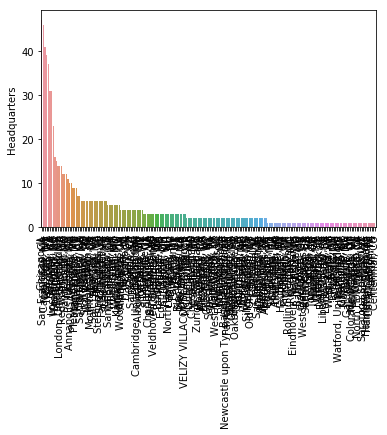

graph for Size: total =8


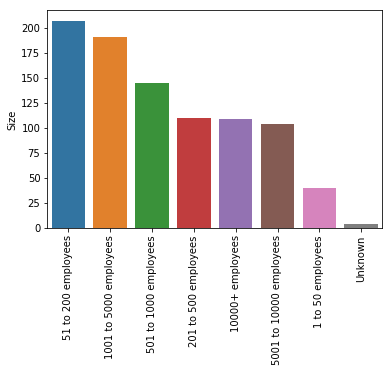

graph for Type of ownership: total =7


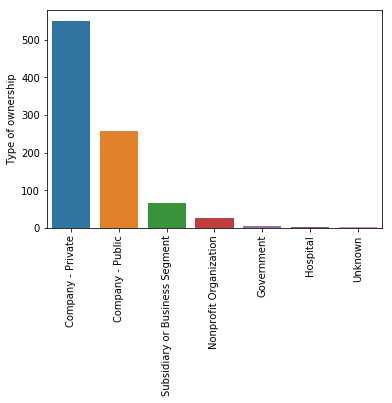

graph for Industry: total =57


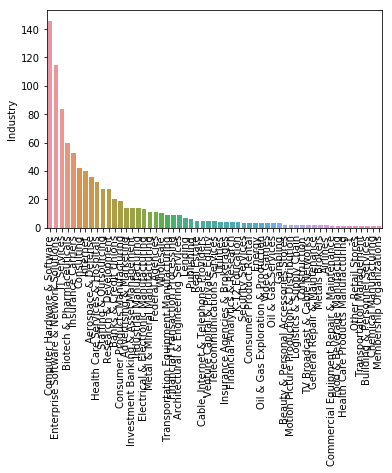

graph for Sector: total =22


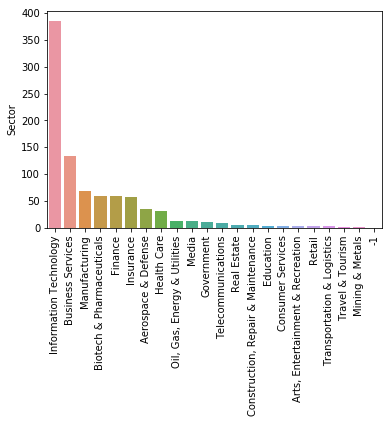

graph for Revenue: total =13


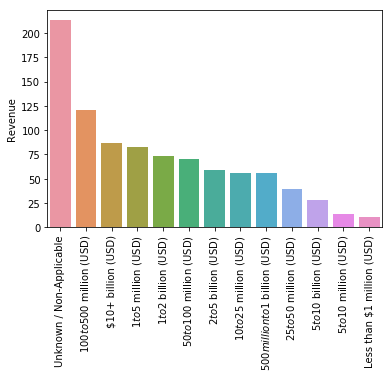

graph for Company_text: total =383


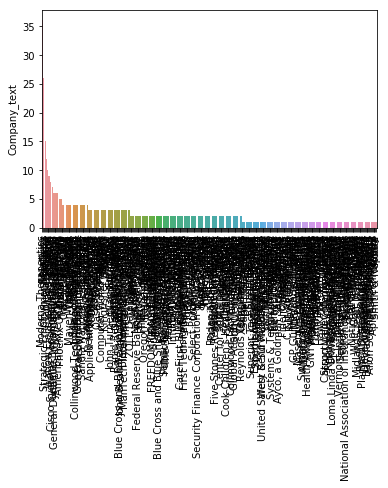

graph for Job_State: total =44


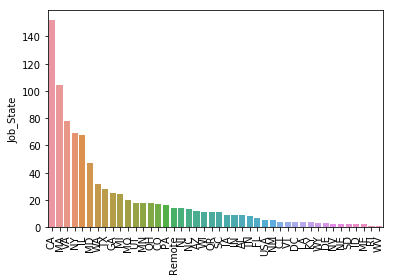

graph for Same_State: total =2


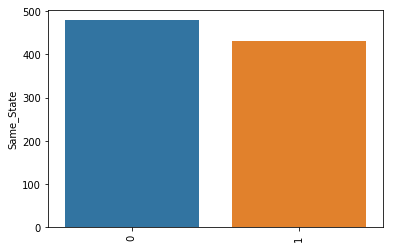

graph for job_simple: total =10


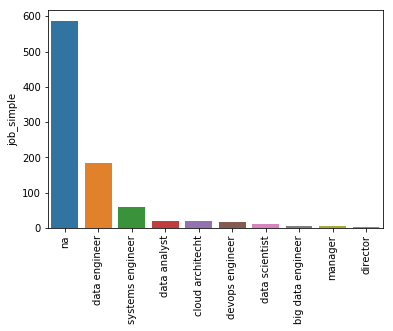

graph for seniority: total =2


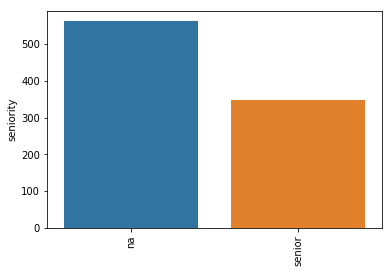

graph for python_yn: total =2


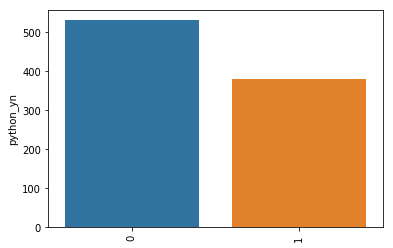

In [64]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total =%d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total =20


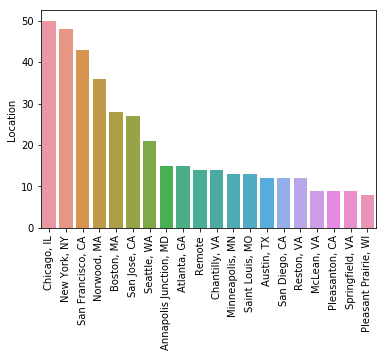

graph for Headquarters: total =20


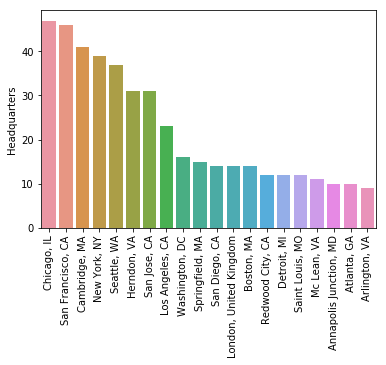

graph for Company_text: total =20


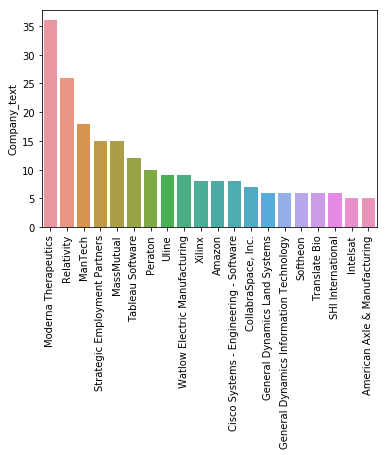

In [67]:
for i in df_cat[['Location', 'Headquarters','Company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total =%d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [69]:
pd.pivot_table(df, index = "job_simple", values = 'avg_salary')

,avg_salary
job_simple,
big data engineer,108.400000
cloud architecht,106.275000
data analyst,103.300000
data engineer,93.716216
data scientist,112.850000
devops engineer,106.625000
director,99.250000
manager,90.400000
na,105.626065


In [70]:
pd.pivot_table(df, index = ["job_simple", 'seniority'], values = 'avg_salary')

avg_salary
job_simple        seniority            
big data engineer na         109.000000
                  senior     107.500000
cloud architecht  na         106.342105
                  senior     105.000000
data analyst      na          98.625000
                  senior     110.312500
data engineer     na          92.492806
                  senior      97.413043
data scientist    na         102.833333
                  senior     127.875000
devops engineer   na         106.625000
director          na          99.250000
manager           na          90.400000
na                na         103.503012
                  senior     108.390196
systems engineer  na         107.310345
                  senior     110.274194

In [84]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['Job_State', 'job_simple'], values = 'avg_salary', aggfunc ='count').sort_values('Job_State', ascending = False)

avg_salary
Job_State job_simple                   
WY        manager                     3
WV        na                          1
WI        systems engineer            2
          na                          8
          data analyst                1
WA        na                         22
          data engineer              10
VT        na                          4
VA        data scientist              1
          big data engineer           2
          data engineer              19
          cloud architecht            5
          devops engineer             2
          na                         45
          systems engineer            4
UT        na                         13
          data scientist              1
          data engineer               4
USA       na                          5
TX        data engineer              14
          na                         14
TN        na                          6
          data engineer               2
SD        systems engineer            2
SC        systems engineer            1
          na                          8
          data engineer               2
Remote    data engineer               2
          cloud architecht            2
          na                         10
RI        data engineer               1
PA        na                         12
          data engineer               3
          data analyst                1
OR        systems engineer            4
          na                          6
          big data engineer           1
OH        na                         17
          data engineer               1
NY        data engineer              12
          data analyst                4
          data scientist              1
          devops engineer             5
          na                         47
NV        data engineer               1
          data analyst                1
NM        na                          5
NJ        systems engineer            3
          na                         10
          data analyst                1
NE        na                          2
NC        data engineer               3
          na                          8
          devops engineer             2
MO        data engineer               6
          na                          9
          cloud architecht            5
MN        data engineer               1
          na                         17
MI        systems engineer            4
          na                         18
          data engineer               2
ME        na                          1
          data analyst                1
MD        systems engineer            8
          na                         34
          devops engineer             1
          data engineer               4
MA        na                         60
          data engineer              14
          cloud architecht            2
          data analyst                2
          systems engineer           23
          data scientist              1
          devops engineer             2
LA        na                          4
KY        systems engineer            2
          cloud architecht            2
IN        na                          5
          data engineer               4
IL        data engineer              19
          cloud architecht            2
          na                         47
ID        data analyst                1
          data engineer               1
IA        na                          9
GA        na                         12
          director                    2
          devops engineer             2
          data engineer               5
          cloud architecht            2
          big data engineer           2
FL        na                          4
          data engineer               3
DE        na                          3
DC        data engineer               1
          na                          3
CT        systems engineer            4
CO        na                 

In [87]:
pd.pivot_table(df[df.job_simple == 'data engineer'], index = 'Job_State', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Job_State,
NY,111.833333
NC,107.166667
GA,103.200000
MN,101.000000
TX,98.964286
CA,98.755556
SC,98.750000
IL,96.973684
ID,96.000000


In [88]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'Company_text', 'Job_State',
       'Same_State', 'Company_Age', 'python_yn', 'SQL_yn', 'Hadoop_yn',
       'AWS_yn', 'job_simple', 'seniority', 'jobdesc_len', 'number_comp'],
      dtype='object')

In [96]:
df_pivots = df[['Rating','Type of ownership', 'Industry', 'Sector', 'Revenue', 'number_comp', 'python_yn', 'avg_salary']]

In [97]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
4.9     115.437500
2.7     113.083333
2.8     112.142857
5.0     111.243243
3.0     109.062500
4.5     107.820513
3.4     107.303030
4.7     106.771930
3.3     105.674419
4.8     104.538462
4.0     103.841463
3.7     103.205607
3.8     102.391667
4.1     101.648438
4.3     101.621212
2.5     101.166667
3.5     100.878378
2.9      99.875000
4.6      99.833333
2.2      99.375000
4.2      99.296296
3.1      99.208333
3.6      98.380952
4.4      97.760870
3.2      97.283333
2.6      97.166667
3.9      97.010000
Type of ownership
                                avg_salary
Type of ownership                         
Government                      114.500000
Company - Public                104.383268
Company - Private               103.233212
Subsidiary or Business Segment  102.932836
Nonprofit Organization           97.148148
Hospital                         89.500000
Unknown                          85.000000
Industry
                            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [108]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()